In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

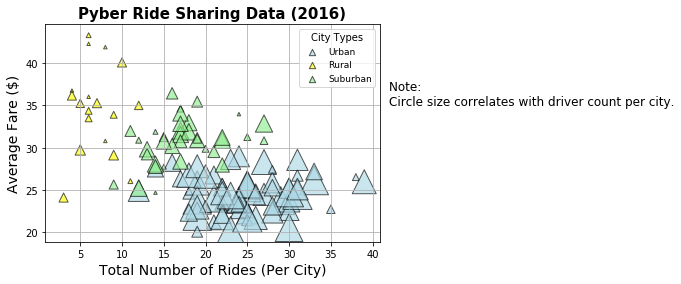

In [29]:
# Obtain the x and y coordinates for each of the three city types
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

# Build the scatter plots for each city types
# Urban calculations
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

# Rural calculations 
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

# Suburban calculations 
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 12, color=["lightblue"], edgecolor="black", alpha = 0.65 , marker="^")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 12, color=["yellow"], edgecolor="black", alpha = 0.65, marker="^")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 12, color=["lightgreen"], edgecolor="black", alpha = 0.65, marker="^")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)" , fontsize=14)
plt.ylabel("Average Fare ($)" , fontsize=14)
plt.title("Pyber Ride Sharing Data (2016)" , fontsize=15, fontweight="bold")

# Create a legend
legend = plt.legend(fontsize = 9, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# Save figure 
plt.savefig("Pyber Ride Sharing Data (2016)", bbox_inches="tight")

In [22]:
# Show plot
plt.show()

## Total Fares by City Type

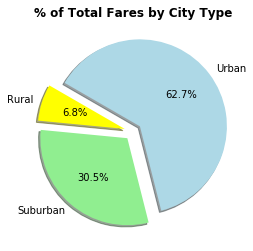

In [48]:
# Calculate Type Percents
type_groupped = pyber_df.groupby(['type'])
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
sizes = [215, 225, 245]
explode = (0.1, 0.1, 0.1)
colors = ["yellow", "lightgreen", "lightblue"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type" , fontsize=12 , fontweight="bold")

# Save Figure
plt.savefig("% of Total Fares by City Type.png")

In [24]:
# Show Figure
plt.show()

## Total Rides by City Type

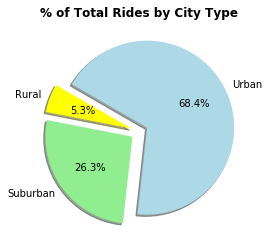

In [56]:
    # Calculate Ride Percents
rides_count = type_groupped['ride_id'].count()
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
sizes = [215, 225, 245]
explode = (0.1, 0.1, 0.1)
colors = ["yellow", "lightgreen", "lightblue"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type" , fontsize=12 , fontweight="bold")


# Save Figure
plt.savefig("% of Total Rides by City Type.png")



In [26]:
# Show Figure
plt.show()

## Total Drivers by City Type

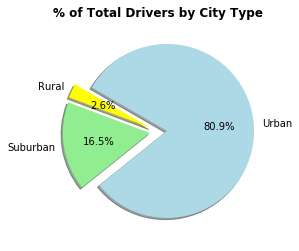

In [27]:
# Calculate Driver Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
sizes = [215, 225, 245]
explode = (0.1, 0.1, 0.1)
colors = ["yellow", "lightgreen", "lightblue"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type", fontsize=12 , fontweight="bold")

# Save Figure
plt.savefig("% of Total Drivers by City Type.png")

In [19]:
# Show Figure
plt.show()